# SSL implementation based on Unet using Image Reconstruction 

Define what is SSL 

Define IMage Reconstruction applied 

Transfer Learning 

## Unet 

In [3]:
!pip install icecream 
from icecream import ic 

# Connect to S3 

# Get images & masks 

In [4]:
X_SIZE = 256
Y_SIZE = 256

In [5]:
import os 
DATASET_DIR = "./dataset/covid-19-chest-x-ray-dataset"
# os.mkdir(os.path.join(DATASET_DIR, "masks"))

# Data preprocessing 

To achieve self supervised learning we compute data degradation. 
The goal is to compute weights of the model by passing this degraded data and retriving the original image which is our `𝑦̂`. 

Degratation precessed : 
- Bed of nails 
- Random pixel drop 
- Random channel drop 

## Bed of nails 

Remove pixels under x and y axis. 

In [6]:
"""import matplotlib.pyplot as plt
import cv2 
f, ax = plt.subplots(1, 3)

# img = torch.rand(((256, 256)))

img = cv2.imread('./test20211213-105144.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (X_SIZE, Y_SIZE))

img_bon1 = img.copy()
img_bon2 = img.copy()

# remove 1 column over 2 & 1 row over 2

img_bon1[1::2, :] = 0
img_bon1[:, 1::2] = 0

# remove 2 columns over 3 & 2 rows over 3
img_bon2[1::3, :] = 0
img_bon2[:, 1::3] = 0
img_bon2[::3, :] = 0
img_bon2[:, ::3] = 0

ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(img_bon1)
ax[1].axis('off')
ax[2].imshow(img_bon2)
ax[2].axis('off')
plt.show()"""

"import matplotlib.pyplot as plt\nimport cv2 \nf, ax = plt.subplots(1, 3)\n\n# img = torch.rand(((256, 256)))\n\nimg = cv2.imread('./test20211213-105144.jpg')\nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nimg = cv2.resize(img, (X_SIZE, Y_SIZE))\n\nimg_bon1 = img.copy()\nimg_bon2 = img.copy()\n\n# remove 1 column over 2 & 1 row over 2\n\nimg_bon1[1::2, :] = 0\nimg_bon1[:, 1::2] = 0\n\n# remove 2 columns over 3 & 2 rows over 3\nimg_bon2[1::3, :] = 0\nimg_bon2[:, 1::3] = 0\nimg_bon2[::3, :] = 0\nimg_bon2[:, ::3] = 0\n\nax[0].imshow(img)\nax[0].axis('off')\nax[1].imshow(img_bon1)\nax[1].axis('off')\nax[2].imshow(img_bon2)\nax[2].axis('off')\nplt.show()"

## Random pixel drop 

In [7]:
"""import random 

img_pix_drop = img.copy()

# Ratio of dropped pixels 
l = 0.75

# Create list of all pixels coordinates tuples 
list_pixels = [(x_i, y_i) for x_i in range(X_SIZE) for y_i in range(Y_SIZE)]
assert len(list_pixels) == X_SIZE * Y_SIZE

# Choice randomly in this list the pixels to drop out 
pixels_to_drop = random.sample(list_pixels, int(l*len(list_pixels)))
# Drop pixels chose 
for (x_i, y_i) in pixels_to_drop:
  img_pix_drop[x_i, y_i, :] = 0

f, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(img_pix_drop)
ax[1].axis('off')"""

"import random \n\nimg_pix_drop = img.copy()\n\n# Ratio of dropped pixels \nl = 0.75\n\n# Create list of all pixels coordinates tuples \nlist_pixels = [(x_i, y_i) for x_i in range(X_SIZE) for y_i in range(Y_SIZE)]\nassert len(list_pixels) == X_SIZE * Y_SIZE\n\n# Choice randomly in this list the pixels to drop out \npixels_to_drop = random.sample(list_pixels, int(l*len(list_pixels)))\n# Drop pixels chose \nfor (x_i, y_i) in pixels_to_drop:\n  img_pix_drop[x_i, y_i, :] = 0\n\nf, ax = plt.subplots(1, 2)\nax[0].imshow(img)\nax[0].axis('off')\nax[1].imshow(img_pix_drop)\nax[1].axis('off')"

## Random channel drop 


In [8]:
"""img_ch_drop = img.copy()

import random 

img_pix_drop = img.copy()
# Ratio of dropped pixels 
l = 0.75

# Create list of all pixels coordinates tuples 
list_pixels = [(x_i, y_i) for x_i in range(X_SIZE) for y_i in range(Y_SIZE)]
assert len(list_pixels) == X_SIZE * Y_SIZE

# Choice randomly in this list the pixels to drop out 
pixels_to_drop_all_channels = []
for i in range(img_pix_drop.shape[2]):
  pixels_to_drop_all_channels.append(random.sample(list_pixels, int(l*len(list_pixels))))
# Drop pixels chose 
for channel, pixels_to_drop in enumerate(pixels_to_drop_all_channels):
  for (x_i, y_i) in pixels_to_drop:
    img_pix_drop[x_i, y_i, channel] = 0

f, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(img_pix_drop)
ax[1].axis('off')"""

"img_ch_drop = img.copy()\n\nimport random \n\nimg_pix_drop = img.copy()\n# Ratio of dropped pixels \nl = 0.75\n\n# Create list of all pixels coordinates tuples \nlist_pixels = [(x_i, y_i) for x_i in range(X_SIZE) for y_i in range(Y_SIZE)]\nassert len(list_pixels) == X_SIZE * Y_SIZE\n\n# Choice randomly in this list the pixels to drop out \npixels_to_drop_all_channels = []\nfor i in range(img_pix_drop.shape[2]):\n  pixels_to_drop_all_channels.append(random.sample(list_pixels, int(l*len(list_pixels))))\n# Drop pixels chose \nfor channel, pixels_to_drop in enumerate(pixels_to_drop_all_channels):\n  for (x_i, y_i) in pixels_to_drop:\n    img_pix_drop[x_i, y_i, channel] = 0\n\nf, ax = plt.subplots(1, 2)\nax[0].imshow(img)\nax[0].axis('off')\nax[1].imshow(img_pix_drop)\nax[1].axis('off')"

## Prepare images for Self supervised training 

In [9]:
OPERATIONS = ["1"] # any compinaison with 1, 2, 3 => ["1", "2"] , ["1", "3"] ["1", "2", "3"] ... 

In [10]:
X_SIZE = 512
Y_SIZE = 512

In [11]:
X1 = []
Y1 = []
X2 = []
Y2 = []
X3 = []
Y3 = []
import random 
import numpy as np 
from glob import glob 
from os.path import join 
from tqdm import tqdm 
import cv2

# Load images in a list 
for img in tqdm(glob(join(DATASET_DIR, "images/*.*"))):
  if img.find(".DS_Store") > -1:
    continue
  # read it in BGR 
  im_BGR = cv2.imread(img)
  # convert it from BGR to RGB 
  im_RGB = cv2.cvtColor(im_BGR, cv2.COLOR_BGR2RGB)
  # resize it to input size of the model 
  im_RGB_resized = cv2.resize(im_RGB, (X_SIZE, Y_SIZE), interpolation= cv2.INTER_NEAREST)
  # im = im / 255.


  image = im_RGB_resized.copy()

  if "1" in OPERATIONS:
    img_bon = im_RGB_resized.copy()
    img_pixel_drop = im_RGB_resized.copy()
    img_channel_drop = im_RGB_resized.copy()
    
    img_bon[1::3, :] = 0
    img_bon[:, 1::3] = 0
    img_bon[::3, :] = 0
    img_bon[:, ::3] = 0

    X1.append(img_bon)
    Y1.append(image)

  if "2" in OPERATIONS:
    # Ratio of dropped pixels 
    l = 0.5

    # Create list of all pixels coordinates tuples 
    list_pixels = [(x_i, y_i) for x_i in range(X_SIZE) for y_i in range(Y_SIZE)]
    assert len(list_pixels) == X_SIZE * Y_SIZE

    # Choice randomly in this list the pixels to drop out 
    pixels_to_drop = random.sample(list_pixels, int(l*len(list_pixels)))
    # Drop pixels chose 
    for (x_i, y_i) in pixels_to_drop:
      img_pixel_drop[x_i, y_i] = 0


    # print(np.min(img_pixel_drop), np.max(img_pixel_drop))
    
    X2.append(img_pixel_drop)
    Y2.append(image)

  if "3" in OPERATIONS:
    # Choice randomly in this list the pixels to drop out 
    pixels_to_drop_all_channels = []
    for i in range(img_pixel_drop.shape[2]):
      pixels_to_drop_all_channels.append(random.sample(list_pixels, int(l*len(list_pixels))))
    # Drop pixels chose 
    for channel, pixels_to_drop in enumerate(pixels_to_drop_all_channels):
      for (x_i, y_i) in pixels_to_drop:
        img_channel_drop[x_i, y_i, channel] = 0

    # plt.imshow(img_channel_drop)
    # plt.show()

    X3.append(img_channel_drop)
    Y3.append(image)




100%|██████████| 6504/6504 [04:14<00:00, 25.56it/s] 


## Split 

In [12]:
from sklearn.model_selection import train_test_split
#### 1 #####
try:
    x1_train, x1_val, y1_train, y1_val = train_test_split(X1, Y1, test_size=0.2, random_state=42)
except:
    x1_train, x1_val, y1_train, y1_val = [], [], [], []
    print("No 1")
#### 2 #####
try:
    x2_train, x2_val, y2_train, y2_val = train_test_split(X2, Y2, test_size=0.2, random_state=42)
except:
    x2_train, x2_val, y2_train, y2_val = [], [], [], []
    print("No 2")

#### 3 #####
try:
    x3_train, x3_val, y3_train, y3_val = train_test_split(X3, Y3, test_size=0.3)
except:
    x3_val, x3_train, y3_val, y3_train = [], [], [], []
    print("No 3")

No 2
No 3


In [13]:
# Concatenate

# x_train = np.concatenate((x1_train, x2_train, x3_train), axis = 0)
# y_train = np.concatenate((y1_train, y2_train, y3_train), axis = 0)

# x_val = np.concatenate((x1_val, x2_val, x3_val), axis = 0)
# y_val = np.concatenate((y1_val, y2_val, y3_val), axis = 0)


In [14]:
len(x1_val)

1301

## Data Loader 

### Dataset 

In [15]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

# num_classes = 3

In [16]:
NUM_CLASSES=0

In [17]:
import torch 

In [18]:
class CustomDataSet(Dataset):
  def __init__(self, X, Y, hidden_classes=None):

    self.hidden_classes = hidden_classes
    
    self.transforms = transforms.Compose([
      transforms.ToPILImage(),
      transforms.ToTensor(),
      # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
      ])
        
    if self.hidden_classes is not None:
      self.n_classes = NUM_CLASSES - len(hidden_classes)
    else:
      self.n_classes = NUM_CLASSES

    # Creating list of paths.
    self.imgs = X
    self.masks = Y
    # Check for consistency in list.
    if len(self.imgs) == 0:
      raise (RuntimeError('Found 0 images, please check the data set'))

  def __getitem__(self, index):
    # Reading items from list.
    img = self.imgs[index]
    mask = self.masks[index] 
    # Reading images.
    
    if self.transforms:
      image = self.transforms(img)
      mask  = self.transforms(mask)
    
    # Turning to tensors.
    image = torch.tensor(image)
    # print(torch.mean(image))
    mask = torch.tensor(mask) 
    
    
    # print(image, mask)
    return image, mask

  def __len__(self):

      return len(self.imgs)

In [19]:
training_data = CustomDataSet(x1_train, y1_train)
val_data = CustomDataSet(x1_val, y1_val)

In [20]:
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=16, shuffle=True)

### SSIM LOSS 

In [21]:
# Loss 
!pip install torchgeometry
from torchgeometry.losses import SSIM, DiceLoss

In [22]:
loss = SSIM(3, "mean")

# Model implementation 



In [23]:
import torch 
import torch.nn as nn 

In [24]:
def double_conv(in_channel, out_channel):
  conv = nn.Sequential(
      nn.Conv2d(in_channel, out_channel, kernel_size=3, padding = 1),
      nn.ReLU(inplace=True),
      nn.Conv2d(out_channel, out_channel, kernel_size=3, padding = 1),
      nn.ReLU(inplace=True)
  )
  return conv

def crop_img(tensor, target_tensor):
  target_size = target_tensor.size()[2]
  tensor_size = tensor.size()[2]
  delta = tensor_size - target_size
  delta = ic(delta) // 2
  return tensor[:, :, delta:tensor_size - delta, delta:tensor_size - delta] 

In [25]:
class UNet(nn.Module):
  def __init__(self):
    super(UNet, self).__init__()

    # encoder 
    self.max_pool2x2 = nn.MaxPool2d(kernel_size=2)
    self.down_conv_1 = double_conv(3, 32)
    self.down_conv_2 = double_conv(32, 64)
    self.down_conv_3 = double_conv(64, 128)
    self.down_conv_4 = double_conv(128, 256)
    self.down_conv_5 = double_conv(256, 512)
    self.down_conv_6 = double_conv(512, 1024)

    # decoder 
    self.up_transpose_1 = nn.ConvTranspose2d(1024, 512, 2, 2)
    self.up_conv_1 = double_conv(1024, 512)
    self.up_transpose_2 = nn.ConvTranspose2d(512, 256, 2, 2)
    self.up_conv_2 = double_conv(512, 256)
    self.up_transpose_3 = nn.ConvTranspose2d(256, 128, 2, 2)
    self.up_conv_3 = double_conv(256, 128)
    self.up_transpose_4 = nn.ConvTranspose2d(128, 64, 2, 2)
    self.up_conv_4 = double_conv(128, 64)
    self.up_transpose_5 = nn.ConvTranspose2d(64, 32, 2, 2)
    self.up_conv_5 = double_conv(64, 32)

    # output layer 
    self.out = nn.Conv2d(32, 3, kernel_size=1)

  def forward(self, image):
    # encoder 
    x1 = self.down_conv_1(image)
    x2 = self.max_pool2x2(x1)
    x3 = self.down_conv_2(x2)
    x4 = self.max_pool2x2(x3)
    x5 = self.down_conv_3(x4)
    x6 = self.max_pool2x2(x5)
    x7 = self.down_conv_4(x6)
    x8 = self.max_pool2x2(x7)
    x9 = self.down_conv_5(x8)
    x10 = self.max_pool2x2(x9)
    x11 = self.down_conv_6(x10)


    #crop x1, x3, x5, x7

    # decoder 
    x = self.up_transpose_1(x11)
    # y = crop_img(x9, x)
    x = self.up_conv_1(torch.cat([x, x9], axis = 1))

    x = self.up_transpose_2(x)
    # y = crop_img(x7, x)
    x = self.up_conv_2(torch.cat([x, x7], axis = 1))

    x = self.up_transpose_3(x)
    # y = crop_img(x5, x)
    x = self.up_conv_3(torch.cat([x, x5], axis = 1))

    x = self.up_transpose_4(x)
    # y = crop_img(x3, x)
    x = self.up_conv_4(torch.cat([x, x3], axis = 1))

    x = self.up_transpose_5(x)
    # y = crop_img(x1, x)
    x = self.up_conv_5(torch.cat([x, x1], axis = 1))
    x_out = self.out(x)
    
    return x_out 
    # print(x.size(), x_out.size())
    # print(x10.size(), x7_croped.size())

In [26]:
# ic.disable()
# image = torch.rand((1, 3, 256, 256)).cuda()
# model = UNet().cuda()
# print(model(image))
# # model.summary()

# Training 

In [27]:
# determine the device to be used for training and evaluation
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# determine if we will be pinning memory during data loading
PIN_MEMORY = True if DEVICE == "cuda" else False

# initialize learning rate, number of epochs to train for, and the
# batch size
INIT_LR = 0.001
NUM_EPOCHS = 400
BATCH_SIZE = 16

In [28]:
unet = UNet().to(DEVICE)
train_steps = len(x1_train) // BATCH_SIZE
val_steps = len(x1_val) // BATCH_SIZE
train_steps #, test_steps

325

### Optimizer

In [29]:
from torchsummary import summary 

In [30]:
from torch.optim import Adam
optimizer = Adam(unet.parameters())

In [31]:
summary(unet, (3, X_SIZE, Y_SIZE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 512, 512]             896
              ReLU-2         [-1, 32, 512, 512]               0
            Conv2d-3         [-1, 32, 512, 512]           9,248
              ReLU-4         [-1, 32, 512, 512]               0
         MaxPool2d-5         [-1, 32, 256, 256]               0
            Conv2d-6         [-1, 64, 256, 256]          18,496
              ReLU-7         [-1, 64, 256, 256]               0
            Conv2d-8         [-1, 64, 256, 256]          36,928
              ReLU-9         [-1, 64, 256, 256]               0
        MaxPool2d-10         [-1, 64, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]          73,856
             ReLU-12        [-1, 128, 128, 128]               0
           Conv2d-13        [-1, 128, 128, 128]         147,584
             ReLU-14        [-1, 128, 1

In [32]:
# initialize a dictionary to store training history
H = {"train_loss": [], "test_loss": []}

In [33]:
ic.disable()
from locale import LC_ALL
import time 
# loop over epochs
print("[INFO] training the network...")
startTime = time.time()
for e in range(NUM_EPOCHS):
	# set the model in training mode
	unet.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalTestLoss = 0
	# loop over the training set
	for (i, (x, y)) in tqdm(enumerate(train_dataloader), desc=f"Epoch {e + 1} in training", leave=False):
		# send the input to the device
		(x, y) = (x.to(DEVICE), y.to(DEVICE))
		# perform a forward pass and calculate the training loss
		pred = unet(x)
		# print(pred)
		# print(y)
		l_ = loss(pred, y)
		# print(l_)
		# first, zero out any previously accumulated gradients, then
		# perform backpropagation, and then update model parameters
		optimizer.zero_grad()
		l_.backward()
		optimizer.step()
		# add the loss to the total training loss so far
		totalTrainLoss += l_
	# switch off autograd
	with torch.no_grad():
		# set the model in evaluation mode
		unet.eval()
		# loop over the validation set
		for (x, y) in val_dataloader:
			# send the input to the device
			(x, y) = (x.to(DEVICE), y.to(DEVICE))
			# make the predictions and calculate the validation loss
			pred = unet(x)
			totalTestLoss += loss(pred, y)
	# calculate the average training and validation loss
	avgTrainLoss = totalTrainLoss / train_steps
	avgTestLoss = totalTestLoss / val_steps
	# update our training history
	H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
	H["test_loss"].append(avgTestLoss.cpu().detach().numpy())
	# print the model training and validation information
	print("[INFO] EPOCH: {}/{}".format(e + 1, NUM_EPOCHS))
	print("Train loss: {:.6f}, Test loss: {:.4f}".format(
		avgTrainLoss, avgTestLoss))
# display the total time needed to perform the training
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))

[INFO] training the network...


Epoch 1 in training: 0it [00:00, ?it/s]/var/folders/kh/bplxdmsj0t7d_70_6fctl6nh0000gn/T/ipykernel_59778/1696961664.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)
/var/folders/kh/bplxdmsj0t7d_70_6fctl6nh0000gn/T/ipykernel_59778/1696961664.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask)
Epoch 1 in training: 1it [04:10, 250.12s/it]

# Results 

## Plot loss curve 

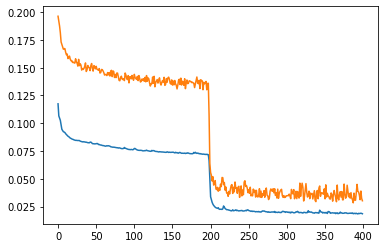

In [ ]:
import matplotlib.pyplot as plt

# f, ax = plt.subplots(1, 2)
# ax[0].plot(range(len(H[0])), H[0])
# ax[1]
# print(H)
# print(H['train_loss'])
Htr = []
Hval = []
for k, v in H.items():
  # print(v)
  if k == "train_loss":
    for vi in v:
      Htr.append(vi)
  else:
    for vi in v:
      Hval.append(vi)
# Hn = [v_i for v_i in v for k, v in H.items()]
# print('Hn = ', Hn)
# print(H)
plt.plot(range(len(Htr)), Htr)
plt.plot(range(len(Hval)), Hval)
plt.show()

## Eval

9
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3)


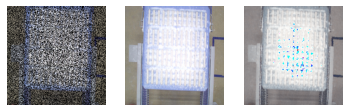

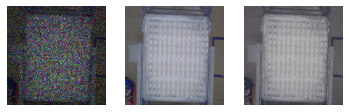

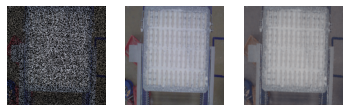

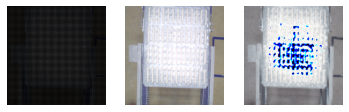

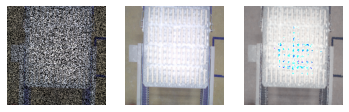

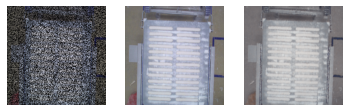

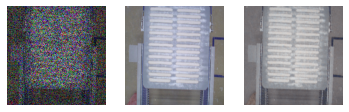

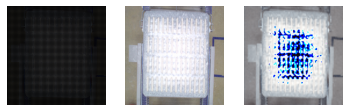

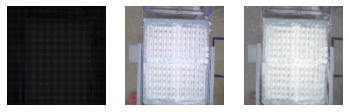

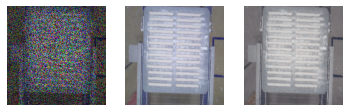

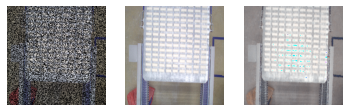

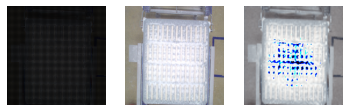

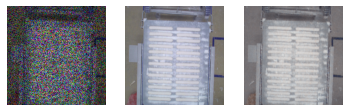

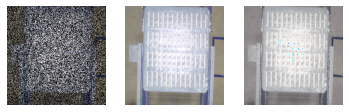

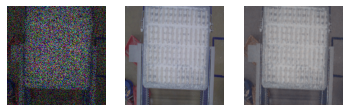

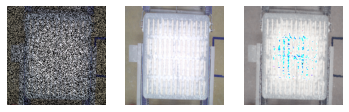

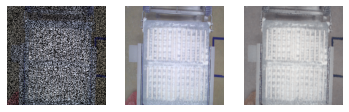

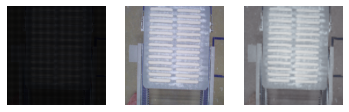

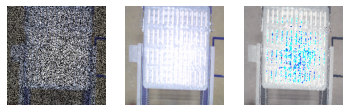

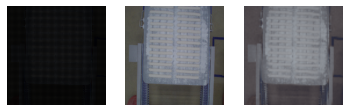

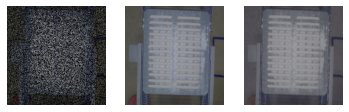

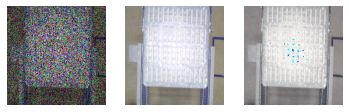

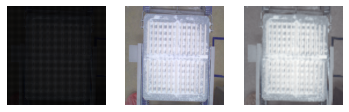

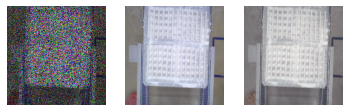

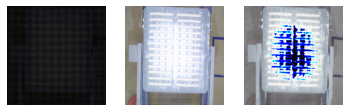

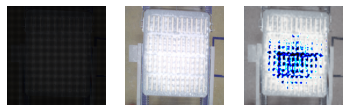

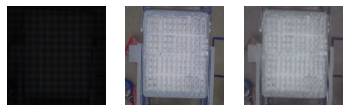

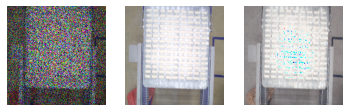

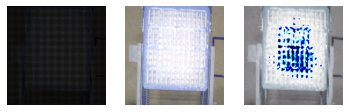

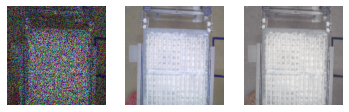

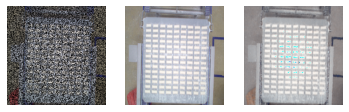

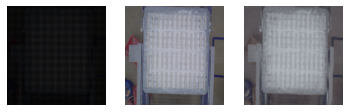

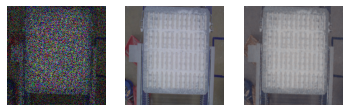

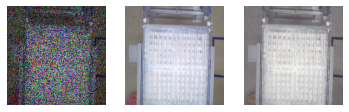

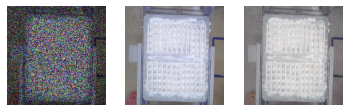

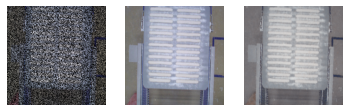

In [ ]:
val_steps = len(x1_val) // BATCH_SIZE
print(val_steps)

with torch.no_grad():
  totalValLoss = 0
  # set the model in evaluation mode
  unet.eval()
  # loop over the validation set
  for (x, y) in val_dataloader:
    # send the input to the device
    (x, y) = (x.to(DEVICE), y.to(DEVICE))
    # make the predictions and calculate the validation loss
    # print(x[0], y[0])
    # print(y.shape)
    pred = unet(x)
    # print(pred.shape)
    totalValLoss += loss(pred, y)
    for i in range(len(pred)):
      # print(pred_i)
      pred_i = (255*np.array(pred[i].cpu())).astype(np.uint8)
      pred_i = np.moveaxis(pred_i, 0, -1)

      x_i = (255*np.array(x[i].cpu())).astype(np.uint8)
      x_i = np.moveaxis(x_i, 0, -1)

      y_i = (255*np.array(y[i].cpu())).astype(np.uint8)
      y_i = np.moveaxis(y_i, 0, -1)
      print(x_i.shape, y_i.shape, pred_i.shape)

      f, ax = plt.subplots(1, 3)
      ax[0].imshow(x_i)
      ax[0].axis('off')
      ax[1].imshow(y_i)
      ax[1].axis('off')
      ax[2].imshow(pred_i)
      ax[2].axis('off')
      # print(pred_i)
      # plt.imshow(pred_i)
      # plt.show()
  
  totalValLoss = totalValLoss if val_steps == 0 else totalValLoss / val_steps

In [ ]:
totalValLoss

tensor(0.0203, device='cuda:0')

## Save weights 

In [ ]:
# unet.save(unet.state_dict())

model_dict = unet.state_dict()

# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in model_dict.items() if k not in ['out.weight', 'out.bias']}
print(pretrained_dict.keys())
# 2. overwrite entries in the existing state dict
# model_dict.update(pretrained_dict) 
# 3. load the new state dict
# model.load_state_dict(pretrained_dict)

dict_keys(['down_conv_1.0.weight', 'down_conv_1.0.bias', 'down_conv_1.2.weight', 'down_conv_1.2.bias', 'down_conv_2.0.weight', 'down_conv_2.0.bias', 'down_conv_2.2.weight', 'down_conv_2.2.bias', 'down_conv_3.0.weight', 'down_conv_3.0.bias', 'down_conv_3.2.weight', 'down_conv_3.2.bias', 'down_conv_4.0.weight', 'down_conv_4.0.bias', 'down_conv_4.2.weight', 'down_conv_4.2.bias', 'down_conv_5.0.weight', 'down_conv_5.0.bias', 'down_conv_5.2.weight', 'down_conv_5.2.bias', 'down_conv_6.0.weight', 'down_conv_6.0.bias', 'down_conv_6.2.weight', 'down_conv_6.2.bias', 'up_transpose_1.weight', 'up_transpose_1.bias', 'up_conv_1.0.weight', 'up_conv_1.0.bias', 'up_conv_1.2.weight', 'up_conv_1.2.bias', 'up_transpose_2.weight', 'up_transpose_2.bias', 'up_conv_2.0.weight', 'up_conv_2.0.bias', 'up_conv_2.2.weight', 'up_conv_2.2.bias', 'up_transpose_3.weight', 'up_transpose_3.bias', 'up_conv_3.0.weight', 'up_conv_3.0.bias', 'up_conv_3.2.weight', 'up_conv_3.2.bias', 'up_transpose_4.weight', 'up_transpose_4.

In [ ]:
!nvidia-smi

Tue Feb  8 15:32:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    41W / 300W |   4567MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.save(pretrained_dict, './ssl_model.pt')

In [ ]:
!aws s3 cp ssl_model.pt s3://automi-data-factory/models/

upload: ./ssl_model.pt to s3://automi-data-factory/models/ssl_model.pt
